# Settings

In [18]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# random seed
import random
np.random.seed(1234)
random.seed(1234)

In [20]:
# read data
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [21]:
# remove warning
import warnings
warnings.filterwarnings("ignore")

# Baseline code

In [22]:
# train data 확인하기
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# test data 확인하기
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
# MSZoning(구역 분류) 수 확인하기
train_df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

RL (Residential Low Density, 저밀도 주거지역): 단독주택 위주의 저밀도 주거만 허용

RM (Residential Medium Density, 중밀도 주거지역): 다가구주택·중층 주거 허용

FV (Floating Village Residential, 수상(뜬) 마을 주거지역): 호수나 하천가 인근 휴양지형 주거

RH (Residential High Density, 고밀도 주거지역): 아파트·다세대주택 등 고밀도 주거 허용

C (all) (Commercial, 상업지역-전용): 모든 상업 용도 허가

In [25]:
# check NaN of train
missing_counts = train_df.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [26]:
# check NaN of test
missing_counts = test_df.isnull().sum()
print(missing_counts[missing_counts > 0 ].sort_values(ascending=False))

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [27]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# 자료형이 object(문자열)인 경우 Label encoding
train_catagories = train_df.columns[train_df.dtypes=="object"]
print(f"train_categories: {train_categories}")

test_catagories = test_df.columns[test_df.dtypes=="object"]
print(f"test_categories: {test_categories}")

train_categories: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
test_categories: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundatio

In [28]:
# Transform
for cat in train_categories:
    le = LabelEncoder()
    print(cat)

    # 결측치는 fillna()로 채우기
    train_df[cat] = train_df[cat].fillna("missing")

    # transform
    le = le.fit(train_df[cat])
    train_df[cat] = le.transform(train_df[cat])
    train_df[cat] = train_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [29]:
# Transform
for cat in test_categories:
    le = LabelEncoder()
    print(cat)

    # 결측치는 fillna()로 채우기
    test_df[cat] = test_df[cat].fillna("missing")

    # transform
    le = le.fit(test_df[cat])
    test_df[cat] = le.transform(test_df[cat])
    test_df[cat] = test_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [31]:
# Set Kfold
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds) # 폴드 수 3

In [35]:
# Set LightGBM and hyperparameter
import lightgbm as lgb
lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

In [36]:
# Create explanatory and objective variables 
train_X = train_df.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df["SalePrice"]

In [39]:
# Loss function
from sklearn.metrics import mean_squared_error

# Early stoppind 조기종료
from lightgbm import early_stopping

In [41]:
# Model Baseline
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    # train, valid 분리
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)

    # light_lgb로 데이터 최적화
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # train
    model_lgb = lgb.train(
        params = lgbm_params,
        train_set = lgb_train,
        valid_sets = [lgb_eval],
        num_boost_round = 1000,
        callbacks = [early_stopping(stopping_rounds=100, verbose=True)]
            # stopping_rounds=100 동안 valid_sets의 첫 번째 지표가 개선되지 않으면 학습을 조기 종료
            # 종료 시점이 model.best_iteration에 기록, verbose=True면 매 몇 번마다 로그 출력
    )

    # RMSE로 정확도 계산
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    # 매 fold마다 학습된 모델 및 rmse 저장
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred # 앞서 만들어둔 oof에 검증 세트에 대한 예측값을 순서대로 채우기

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
487           20        3         70.0    12243      1     2        0   
488          190        3         60.0    10800      1     2        3   
489          180        4         21.0     1526      1     2        3   
490          160        4          NaN     2665      1     2        3   
491           50        3         79.0     9490      1     2        3   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60        3         62.0     7917      1     2        3   
1456          20        3         85.0    13175      1     2        3   
1457          70        3         66.0     9042      1     2        3   
1458          20        3         68.0     9717      1     2        3   
1459          20        3         75.0     9937      1     2        3   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
487            3         0         4  ...   

In [42]:
# Average RMSE
sum(rmses)/len(rmses)

0.13608152733482728

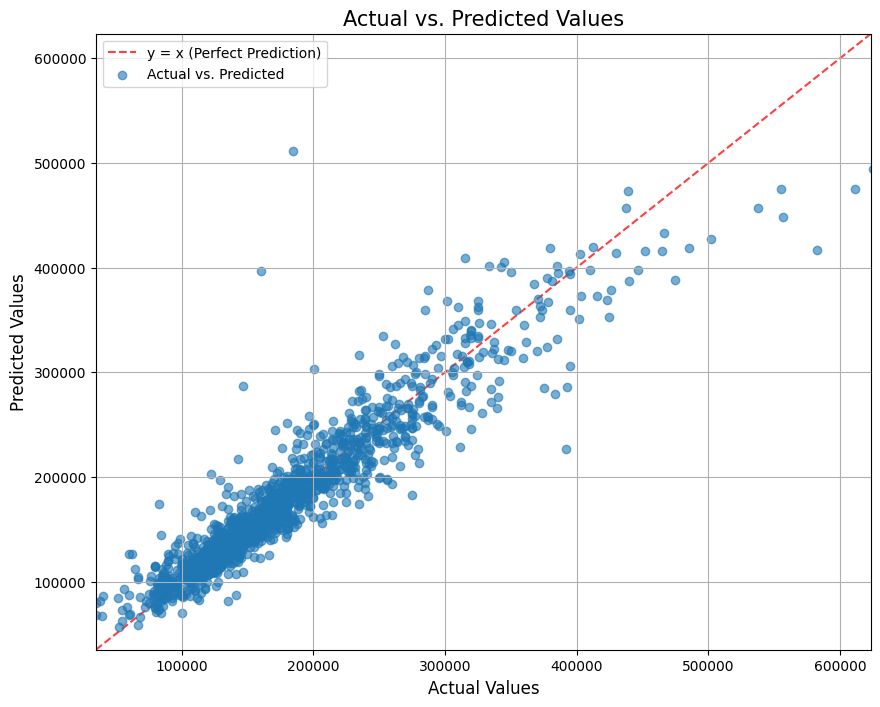

In [43]:
# Create dataframe
actual_pred_df = pd.DataFrame({
    'actual': train_Y,
    'pred': oof
})

# Create graph
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the y=x reference line
# Adjust the range of the x-size and y-axis to be the same
lims = [
    np.min([actual_pred_df['actual'].min(), actual_pred_df['pred'].min()]),
    np.min([actual_pred_df['actual'].max(), actual_pred_df['pred'].max()]),
]
ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='y = x (Perfect Prediction)')

# Draw a scatter plot
ax.scatter(actual_pred_df['actual'], actual_pred_df['pred'], alpha=0.6, label='Actual vs. Predicted')

# Label and title
ax.set_xlabel('Actual Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
ax.set_title('Actual vs. Predicted Values', fontsize=15)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.legend()
plt.grid(True)
plt.show()

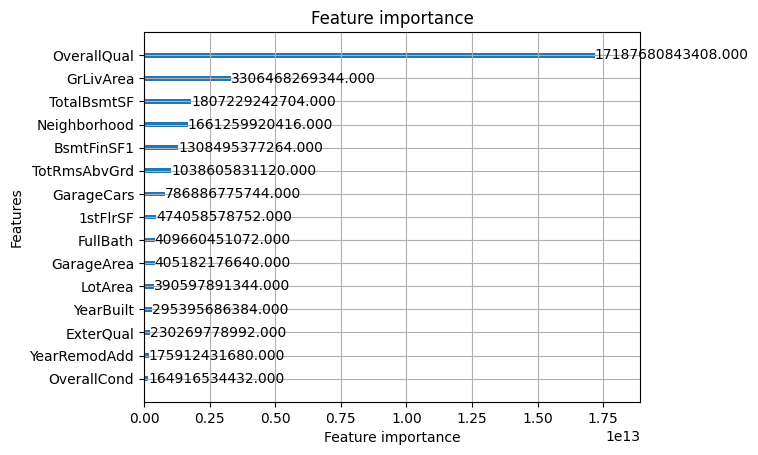

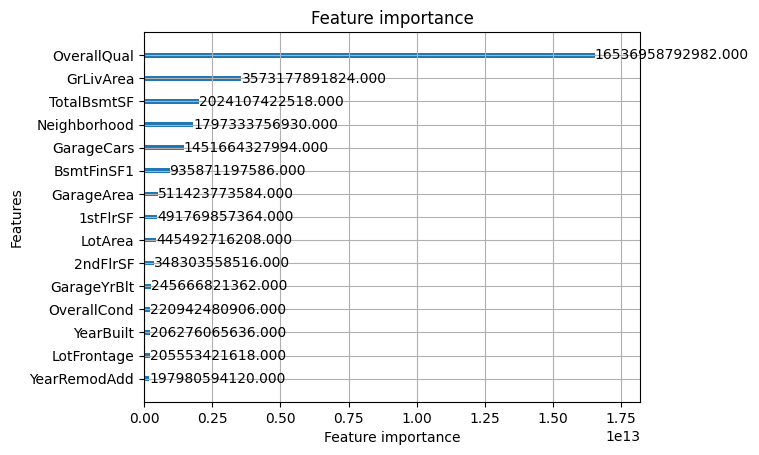

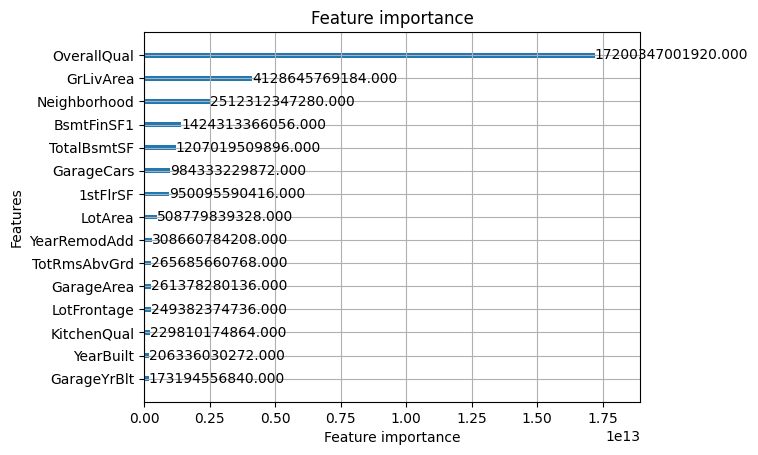

In [44]:
# Check importance 
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=15)

# Preprocessing
## Preprocessing1: Log the target variable

In [45]:
# Distribution of SalePrice data
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

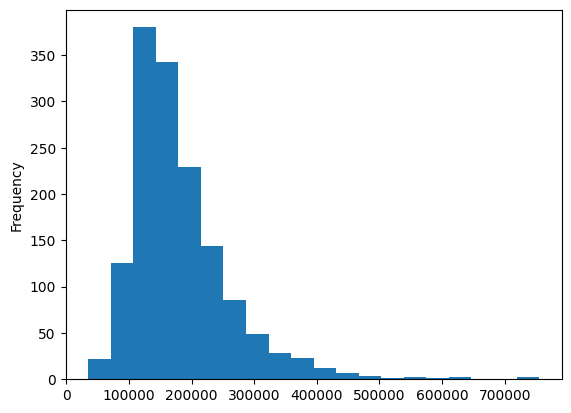

In [46]:
train_df["SalePrice"].plot.hist(bins=20)

In [47]:
# Log the target variable -> 기존 가격에 로그를 취해서 데이터를 정규분포에 가깝게 만들기
np.log(train_df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

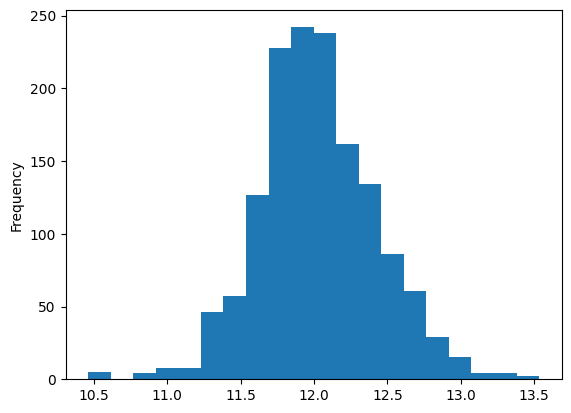

In [48]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

In [49]:
# Apply to dataset
pd.options.mode.chained_assignment = None # 경고 출력 방지

# 취한 로그값을 train_df에 저장
train_df["SalePrice_log"] = np.log(train_df["SalePrice"])
train_X = train_df.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df["SalePrice_log"]

In [50]:
# Recheck Model Performance
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    # train, valid 분리
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)

    # light_lgb로 데이터 최적화
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # train
    model_lgb = lgb.train(
        params = lgbm_params,
        train_set = lgb_train,
        valid_sets = [lgb_eval],
        num_boost_round = 1000,
        callbacks = [early_stopping(stopping_rounds=100, verbose=True)]
            # stopping_rounds=100 동안 valid_sets의 첫 번째 지표가 개선되지 않으면 학습을 조기 종료
            # 종료 시점이 model.best_iteration에 기록, verbose=True면 매 몇 번마다 로그 출력
    )

    # RMSE로 정확도 계산
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    # 매 fold마다 학습된 모델 및 rmse 저장
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred # 앞서 만들어둔 oof에 검증 세트에 대한 예측값을 순서대로 채우기

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
487           20        3         70.0    12243      1     2        0   
488          190        3         60.0    10800      1     2        3   
489          180        4         21.0     1526      1     2        3   
490          160        4          NaN     2665      1     2        3   
491           50        3         79.0     9490      1     2        3   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60        3         62.0     7917      1     2        3   
1456          20        3         85.0    13175      1     2        3   
1457          70        3         66.0     9042      1     2        3   
1458          20        3         68.0     9717      1     2        3   
1459          20        3         75.0     9937      1     2        3   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
487            3         0         4  ...   

In [51]:
# Average RMSE
sum(rmses)/len(rmses)

0.011119745420364464

## Preprocessing2: Transform explanatory variables with many missing values
결측치가 많은 열 전처리

In [53]:
# Check the previous Check dataset NaN result!!

# "PoolQC"(수영장품질), "MiscFeature"(특수시설), "Alley"(대지 뒷편 골목의 종류)는 결측치가 90%가 넘는다. 
# 이는 , 모델 성능의 저하로 이어지므로, 원래는 ‘Ex’, ‘Gd’, ‘Fa’ 등 시설의 등급/명칭이 들어 있으나, 
# 시설이 있으면 1, 없으면(결측) 0으로 단순화한다.

tmp_train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
tmp_test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

print(tmp_train_df.PoolQC.value_counts(), f"\nNaN value: {tmp_train_df.PoolQC.isnull().sum()}\n")
print(tmp_train_df.MiscFeature.value_counts(), f"\nNaN value: {tmp_train_df.MiscFeature.isnull().sum()}\n")
print(tmp_train_df.Alley.value_counts(), f"\nNaN value: {tmp_train_df.Alley.isnull().sum()}\n")
print("\n\n")
print(tmp_test_df.PoolQC.value_counts(), f"\nNaN value: {tmp_test_df.PoolQC.isnull().sum()}\n")
print(tmp_test_df.MiscFeature.value_counts(), f"\nNaN value: {tmp_test_df.MiscFeature.isnull().sum()}\n")
print(tmp_test_df.Alley.value_counts(), f"\nNaN value: {tmp_test_df.Alley.isnull().sum()}\n")

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64 
NaN value: 1453

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64 
NaN value: 1406

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 
NaN value: 1369




PoolQC
Ex    2
Gd    1
Name: count, dtype: int64 
NaN value: 1456

MiscFeature
Shed    46
Gar2     3
Othr     2
Name: count, dtype: int64 
NaN value: 1408

Alley
Grvl    70
Pave    37
Name: count, dtype: int64 
NaN value: 1352



In [54]:
# Transform explanatory variables with many missing values
cols = ["PoolQC", "MiscFeature", "Alley"]

# 결측치가 없는 주택을 고급 시설로 지정
for d in [tmp_train_df, tmp_test_df]:
    d['hasHighFacility'] = d[cols].notnull().astype(int).sum(axis=1)

train_df['hasHighFacility'] = tmp_train_df['hasHighFacility'].values
test_df['hasHighFacility'] = tmp_test_df['hasHighFacility'].values

train_df.drop(cols, axis=1, inplace=True)
test_df.drop(cols, axis=1, inplace=True)

print(train_df['hasHighFacility'].value_counts())
print(test_df['hasHighFacility'].value_counts())

# 0 -> 고급 주택 설비 없음
# 1 -> 고급 주택 설비 1개
# 2 -> 고급 주택 설비 2개

hasHighFacility
0    1313
1     142
2       5
Name: count, dtype: int64
hasHighFacility
0    1302
1     153
2       4
Name: count, dtype: int64


## Preprocessing3: Outlier
이상치 처리

In [55]:
# Check the statistics of train data
train_df.describe().T # 열의 수가 많으므로 전치

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [56]:
# Extract only numeric data
train_df_num = train_df.select_dtypes(include=[np.number])
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

# num_features: 연속형(비율 척도)으로 해석할 수 있는 모든 수치형 변수
# 아래 8개의 비율 해석이 애매한(non‐ratio) 특성을 제외한 뒤 남은 변수 리스트

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'SalePrice_log',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'hasHighFacility']

In [58]:
# Checking variables with multiple data values of 0 거의 대부분의 값이 0인 열
train_df_num_rs = train_df_num[num_features]
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344
hasHighFacility 1313


In [59]:
# Check for outliers
# 평균과 표준편차 계산. 평균에서 ±3σ를 벗어난 값, 통계적으로 0.3% 미만의 확률로 나타나는 이상치(outlier) 찾기
for col in num_features:
    tmp_df = train_df_num_rs[
        (train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) | 
        (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)
    ]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
SalePrice_log 12
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22
hasHighFacility 5


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,hasHighFacility
1298,1299,60,3,313.0,63887,1,2,0,0,0,...,480,4,0,1,2008,6,5,160000,11.982929,1


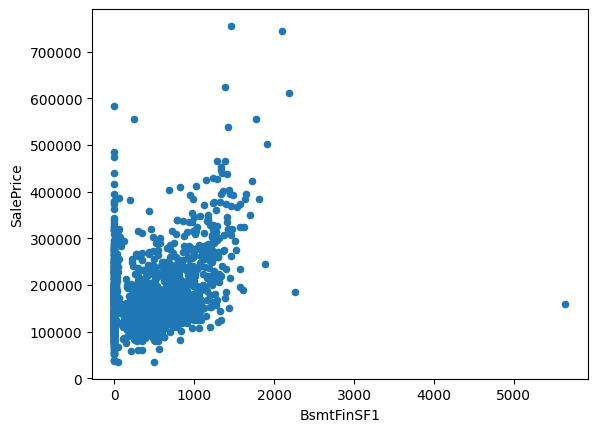

In [60]:
# Visualizing the distribution of variables containing outliers
# BsmtFinSF1 > 5000 : 1구역 지하 마감 면적이 5 000 ft² 이상인 샘플
train_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")
train_df[train_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,hasHighFacility
1298,1299,60,3,313.0,63887,1,2,0,0,0,...,480,4,0,1,2008,6,5,160000,11.982929,1


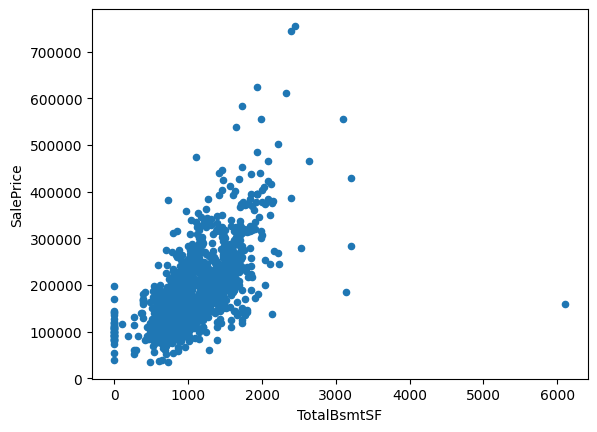

In [61]:
# TotalBsmtSF > 6000 : 총 지하 면적이 6 000 ft² 이상인 샘플
train_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")
train_df[train_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,hasHighFacility
1298,1299,60,3,313.0,63887,1,2,0,0,0,...,480,4,0,1,2008,6,5,160000,11.982929,1


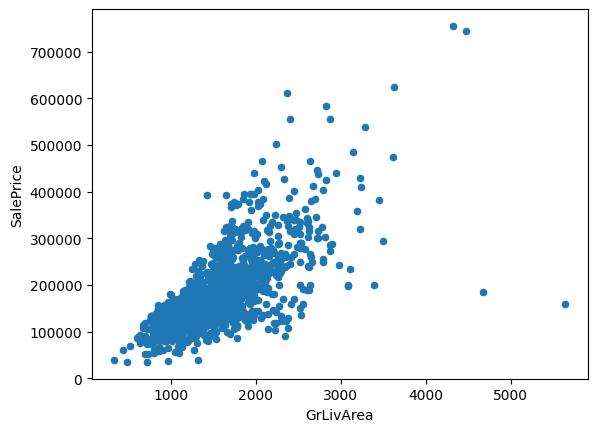

In [62]:
# GrLivArea > 5000 : 지상 거주 면적이 5 000 ft² 이상인 샘플
train_df.plot.scatter(x="GrLivArea", y="SalePrice")
train_df[train_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,hasHighFacility
1298,1299,60,3,313.0,63887,1,2,0,0,0,...,480,4,0,1,2008,6,5,160000,11.982929,1


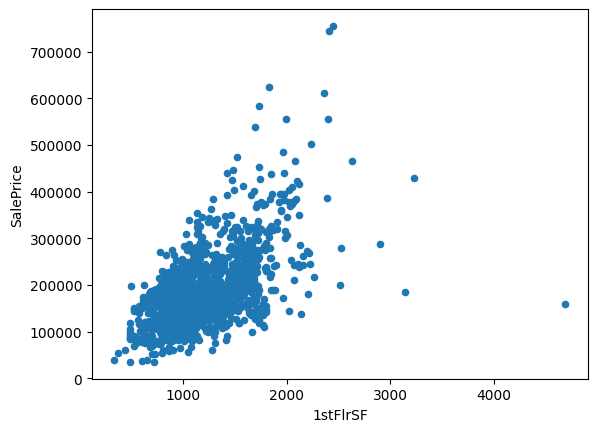

In [63]:
# 1stFlrSF > 4000 : 1층 마감 면적이 4 000 ft² 이상인 샘플
train_df.plot.scatter(x="1stFlrSF", y="SalePrice")
train_df[train_df["1stFlrSF"] > 4000]

In [64]:
# Remove outlier
train_df = train_df[(train_df['BsmtFinSF1'] < 2000)]
train_df = train_df[(train_df['TotalBsmtSF'] < 3000)]
train_df = train_df[(train_df['GrLivArea'] < 4500)]
train_df = train_df[(train_df['1stFlrSF'] < 2500)]
train_df = train_df[(train_df['LotArea'] < 100000)]

In [65]:
# Split data into train and test
train_df["SalePrice_log"] = np.log(train_df["SalePrice"])
train_X = train_df.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df["SalePrice_log"]
test_X = test_df.drop(["Id"], axis=1)

In [66]:
# Recheck Model Performance
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(
        params=lgbm_params,
        train_set=lgb_train,
        valid_sets=[lgb_eval],
        num_boost_round=1000,
        callbacks=[early_stopping(stopping_rounds=100, verbose=True)]
    )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
487           20        3         70.0    12243      1        0           3   
488          190        3         60.0    10800      1        3           3   
489          180        4         21.0     1526      1        3           3   
490          160        4          NaN     2665      1        3           3   
491           50        3         79.0     9490      1        3           3   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60        3         62.0     7917      1        3           3   
1456          20        3         85.0    13175      1        3           3   
1457          70        3         66.0     9042      1        3           3   
1458          20        3         68.0     9717      1        3           3   
1459          20        3         75.0     9937      1        3           3   

     Utilities LotConfig LandSlope  ... 3SsnPorch S

In [67]:
sum(rmses)/len(rmses)

0.1294706948265821